In [1]:
# Import Dependencies

import pandas as pd
import numpy as np
import matplotlib as plt


In [2]:
# Create a set of random latitude and longitute combinations:

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [6]:
# Use the print() function to show the lat and long combinations

for coordinate in coordinates:
    print(coordinate[0],coordinate[1])
    

-42.813996193655825 -145.2582889727392
42.6887651244877 -110.53260186105365
-37.17885883027915 -138.96153377245813
89.98525606033394 -74.67652282207304
62.71248613805511 22.49510849514644
85.021713544602 -127.28141986546254
44.110607861743375 34.15403914806089
47.43180763260466 139.8485232447457
-69.07572521874823 -95.57836782942745
-65.65281137136307 -78.78807294202478
23.633285617236254 -57.662542904515874
-58.59823732576689 47.498692637931896
49.708737714388775 -20.414433365295366
-19.477849220805638 -60.93066911351089
50.83132935592789 73.49032227365998
-68.6594830120589 -167.65031480288704
87.39744295543278 13.21116258397683
39.53700994036788 -120.80231387799047
-74.29382746013619 151.55293682604537
55.9747561723963 -164.99127161937767
-36.278369508875635 95.64717949253532
-57.67303181851388 130.24249683520844
68.39156956595761 116.50949467858663
-11.079573203641644 21.120767811303125
-23.56696164809759 121.10344615398452
72.57081900026378 -63.27300046522143
80.0875048816502 -169.

In [10]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [12]:
# Create a list for holding the cities.

cities = []
# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.

len(cities)

605

In [15]:
# Import the requests library:

import requests

# Import the API key
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


# Import the time library and datetima module

import time
from datetime import datetime

In [17]:
# Create an empty lsit to hold the weather data:

city_data = []

# Print the beginning of the logging:

print("Beginning Data Retrieval    ")
print("-------------")

# create counters:

record_count = 1
set_count = 1

# loop through cities in the list:

for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes:
    if (i % 50 == 0 and i >= 50):
        set_count+= 1
        record_count =1 
        time.sleep(60)
        
    # Create endpoint URL with each city:
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city:
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1

    
# Run an API request for each of the cities:

    try:
        # Parse the JSON and retrieve DATA:
        city_weather = requests.get(city_url).json()
        # parse out the needed DATA:
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        # Convert the date for ISO standard:

        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d- %H:%M;%S')

        # Append the city information into the city_data list:

        city_data.append({"City": city.title(),
                         "Lat" : city_lat,
                         "lng" : city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})

# If an error occurs, skip the city:
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data loading is complete:

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
-------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | jackson
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | ilmajoki
Processing Record 6 of Set 1 | tuktoyaktuk
Processing Record 7 of Set 1 | katsiveli
City not found. Skipping...
Processing Record 8 of Set 1 | sovetskaya gavan
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | codrington
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | dingle
Processing Record 13 of Set 1 | mayor pablo lagerenza
Processing Record 14 of Set 1 | aktau
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 17 of Set 1 | grass valley
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | portland
Processing Record 22 of

Processing Record 41 of Set 4 | jaisalmer
Processing Record 42 of Set 4 | quelimane
Processing Record 43 of Set 4 | adrar
Processing Record 44 of Set 4 | ambon
Processing Record 45 of Set 4 | castro
Processing Record 46 of Set 4 | slatina
Processing Record 47 of Set 4 | leninskoye
Processing Record 48 of Set 4 | amderma
City not found. Skipping...
Processing Record 49 of Set 4 | duz
City not found. Skipping...
Processing Record 50 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 1 of Set 5 | talnakh
Processing Record 2 of Set 5 | los alamos
Processing Record 3 of Set 5 | casablanca
Processing Record 4 of Set 5 | hilchenbach
Processing Record 5 of Set 5 | asau
Processing Record 6 of Set 5 | bondoukou
Processing Record 7 of Set 5 | korla
Processing Record 8 of Set 5 | baependi
Processing Record 9 of Set 5 | sao filipe
Processing Record 10 of Set 5 | bereda
Processing Record 11 of Set 5 | san jose
Processing Record 12 of Set 5 | sayyan
Processing Record 13 of Set 5 | n

Processing Record 29 of Set 8 | kankakee
Processing Record 30 of Set 8 | la paz
Processing Record 31 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 32 of Set 8 | pangody
Processing Record 33 of Set 8 | antofagasta
Processing Record 34 of Set 8 | mehamn
Processing Record 35 of Set 8 | maturin
Processing Record 36 of Set 8 | prudy
Processing Record 37 of Set 8 | tiznit
Processing Record 38 of Set 8 | itoman
Processing Record 39 of Set 8 | flagstaff
Processing Record 40 of Set 8 | daxian
City not found. Skipping...
Processing Record 41 of Set 8 | luderitz
Processing Record 42 of Set 8 | ponnani
Processing Record 43 of Set 8 | gualaquiza
Processing Record 44 of Set 8 | nanao
Processing Record 45 of Set 8 | sinnamary
Processing Record 46 of Set 8 | grindavik
Processing Record 47 of Set 8 | okha
Processing Record 48 of Set 8 | bintulu
Processing Record 49 of Set 8 | menongue
Processing Record 50 of Set 8 | bedele
Processing Record 1 of Set 9 | dubbo
Processing Record 2 of 

City not found. Skipping...
Processing Record 20 of Set 12 | almaznyy
Processing Record 21 of Set 12 | waipawa
Processing Record 22 of Set 12 | vrangel
Processing Record 23 of Set 12 | chicla
Processing Record 24 of Set 12 | ust-ilimsk
Processing Record 25 of Set 12 | lorengau
Processing Record 26 of Set 12 | mancora
Processing Record 27 of Set 12 | pisco
Processing Record 28 of Set 12 | gaya
Processing Record 29 of Set 12 | nosy varika
Processing Record 30 of Set 12 | keetmanshoop
Processing Record 31 of Set 12 | kutum
Processing Record 32 of Set 12 | nyurba
Processing Record 33 of Set 12 | goundam
Processing Record 34 of Set 12 | garbolovo
Processing Record 35 of Set 12 | akdepe
Processing Record 36 of Set 12 | burica
City not found. Skipping...
Processing Record 37 of Set 12 | ponta delgada
Processing Record 38 of Set 12 | tungkang
City not found. Skipping...
Processing Record 39 of Set 12 | hualmay
Processing Record 40 of Set 12 | svetlaya
Processing Record 41 of Set 12 | saint-pie

In [20]:
len(city_data)

557

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,51.48,75,97,8.41,NZ,2022-07-17- 19:43;23
1,Jackson,42.4165,-122.8345,82.04,51,0,5.75,US,2022-07-17- 19:38;46
2,Rikitea,-23.1203,-134.9692,73.47,82,79,15.70,PF,2022-07-17- 19:43;23
3,Qaanaaq,77.4840,-69.3632,47.08,58,100,3.96,GL,2022-07-17- 19:43;23
4,Ilmajoki,62.7333,22.5667,55.87,88,0,2.30,FI,2022-07-17- 19:43;24
5,Tuktoyaktuk,69.4541,-133.0374,59.00,88,75,8.05,CA,2022-07-17- 19:43;24
6,Sovetskaya Gavan,48.9723,140.2878,55.49,99,100,9.57,RU,2022-07-17- 19:43;25
7,Punta Arenas,-53.1500,-70.9167,37.51,81,0,26.46,CL,2022-07-17- 19:43;25
8,Codrington,-38.2667,141.9667,48.54,71,100,18.21,AU,2022-07-17- 19:43;25
9,East London,-33.0153,27.9116,69.49,32,0,8.37,ZA,2022-07-17- 19:40;04


In [27]:
new_column_order = ["City", "Country", "Date", "Lat", "lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-07-17- 19:43;23,-46.1927,168.8643,51.48,75,97,8.41
1,Jackson,US,2022-07-17- 19:38;46,42.4165,-122.8345,82.04,51,0,5.75
2,Rikitea,PF,2022-07-17- 19:43;23,-23.1203,-134.9692,73.47,82,79,15.70
3,Qaanaaq,GL,2022-07-17- 19:43;23,77.4840,-69.3632,47.08,58,100,3.96
4,Ilmajoki,FI,2022-07-17- 19:43;24,62.7333,22.5667,55.87,88,0,2.30
5,Tuktoyaktuk,CA,2022-07-17- 19:43;24,69.4541,-133.0374,59.00,88,75,8.05
6,Sovetskaya Gavan,RU,2022-07-17- 19:43;25,48.9723,140.2878,55.49,99,100,9.57
7,Punta Arenas,CL,2022-07-17- 19:43;25,-53.1500,-70.9167,37.51,81,0,26.46
8,Codrington,AU,2022-07-17- 19:43;25,-38.2667,141.9667,48.54,71,100,18.21
9,East London,ZA,2022-07-17- 19:40;04,-33.0153,27.9116,69.49,32,0,8.37


In [28]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [34]:
# Get relevant fields from the DF for plotting purposes:

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]



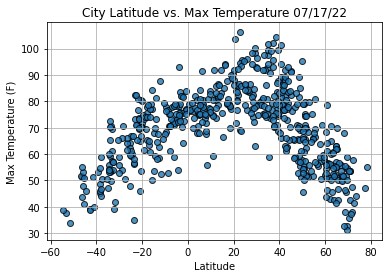

In [35]:
# Import time module

import time
import matplotlib.pyplot as plt

# Scatter Plot building:
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Other graph properties:

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the graph:

plt.savefig("weather_data/Fig1.png")

# Show plot:

plt.show()

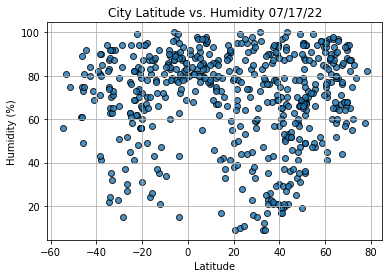

In [36]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

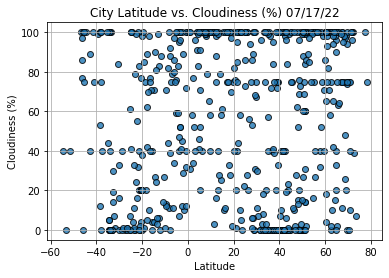

In [37]:
# Build the scatter plots for latitude vs. cloudiness.

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

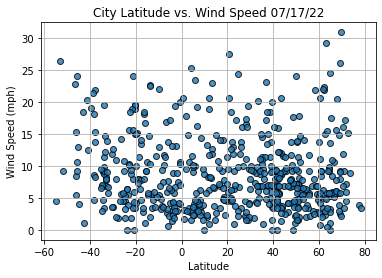

In [38]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()